# WeatherPy

## Observation
1. Although the data when pulled is random there is not a significant change in the charts as it is based on the location.
2. There are more cities in the northern hemisphere which could cause some discrepicies when comparing the two hemishperes.
3. Lastly the cities in the northern hemipshere span farther from the equator than the cities in the southern which could cause the data to trend differently.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

In [3]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).


#build URL query
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

#create lists to store API data
city_name = []
max_temp = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

index = 0
set = 1

print('Beginning Data Retrieval')  
print('-----------------------------')

# iterate through random cities and capture API data to store in the lists
for city in cities:

    try:
        
        response = requests.get(base_url + city).json()
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        index = index + 1
        set = set
        
        if index > 50:
            index = 1
            set += 1
        
        time.sleep(1)
       
        print(f"Processing Record {index} of Set {set} | {city}")
    
    except (KeyError, IndexError):
         print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | sakaiminato
Processing Record 3 of Set 1 | palencia
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | svetlaya
Processing Record 7 of Set 1 | puro
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | san andres
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | pahrump
Processing Record 15 of Set 1 | pontalina
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | calgary
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | emba
Processing Record 21 of Set 1 | puerto escondido
Processing Record 22 of Set 1 | pochutla
Processing Record 23 of Set 1 | george

Processing Record 38 of Set 4 | noyabrsk
Processing Record 39 of Set 4 | tasiilaq
Processing Record 40 of Set 4 | vardo
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | carolina
Processing Record 43 of Set 4 | aykhal
Processing Record 44 of Set 4 | bartica
Processing Record 45 of Set 4 | santa maria
Processing Record 46 of Set 4 | sawakin
Processing Record 47 of Set 4 | adrar
Processing Record 48 of Set 4 | pangnirtung
Processing Record 49 of Set 4 | fuling
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | camacha
Processing Record 2 of Set 5 | lang son
Processing Record 3 of Set 5 | bahar
Processing Record 4 of Set 5 | tondano
Processing Record 5 of Set 5 | husavik
Processing Record 6 of Set 5 | verkhoyansk
Processing Record 7 of Set 5 | piacabucu
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | chernyshevskiy
Processing Record 10 of Set 5 | rio grande
Processing Record 11 of Set 5 | baculin
Processing Record 12 of Set 5

Processing Record 30 of Set 8 | khorixas
Processing Record 31 of Set 8 | prokopyevsk
City not found. Skipping...
Processing Record 32 of Set 8 | roebourne
Processing Record 33 of Set 8 | nome
Processing Record 34 of Set 8 | gondanglegi
Processing Record 35 of Set 8 | coracora
Processing Record 36 of Set 8 | havre-saint-pierre
Processing Record 37 of Set 8 | ambulu
Processing Record 38 of Set 8 | homer
Processing Record 39 of Set 8 | san policarpo
City not found. Skipping...
Processing Record 40 of Set 8 | dunkirk
Processing Record 41 of Set 8 | ostrovnoy
Processing Record 42 of Set 8 | lazaro cardenas
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | murray bridge
Processing Record 45 of Set 8 | stelle
Processing Record 46 of Set 8 | esperance
Processing Record 47 of Set 8 | tiksi
Processing Record 48 of Set 8 | minna
Processing Record 49 of Set 8 | boppard
Processing Record 50 of Set 8 | coari
Processing Record 1 of Set 9 | ferreira do alentejo
Processing Record 2 o

Processing Record 21 of Set 12 | mandalay
Processing Record 22 of Set 12 | oloron-sainte-marie
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:
#Create a dataframe to house raw data
weather_data = {
    'City': city_name,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}
weather_df = pd.DataFrame(weather_data)

# Save Data to csv
weather_df.to_csv("WeatherPy_Output.csv")

weather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,62.01,83,0,1.01,AU,1612045501
1,Sakaiminato,35.5500,133.2333,37.40,93,40,6.91,JP,1612045502
2,Palencia,42.4167,-4.5000,39.99,89,27,7.00,ES,1612045499
3,Punta Arenas,-53.1500,-70.9167,55.40,58,0,21.85,CL,1612045326
4,Chui,-33.6971,-53.4616,75.52,71,59,14.00,UY,1612045506


In [5]:
weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.00000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.179519,17.266591,48.50993,73.564685,55.297203,8.492727,1.612046e+09
std,33.759607,90.339856,33.01413,18.812775,39.331976,5.887263,2.369587e+02
min,-54.800000,-175.200000,-52.94000,15.000000,0.000000,0.290000,1.612045e+09
25%,-7.566550,-60.561175,28.30500,63.000000,17.000000,3.595000,1.612046e+09
50%,23.150000,20.661400,60.64000,78.000000,71.500000,7.010000,1.612046e+09
75%,49.337275,100.364475,75.34250,88.000000,95.000000,11.642500,1.612046e+09
max,78.218600,179.316700,89.60000,100.000000,100.000000,35.680000,1.612046e+09


 ## Latitude vs. Temperature Plot

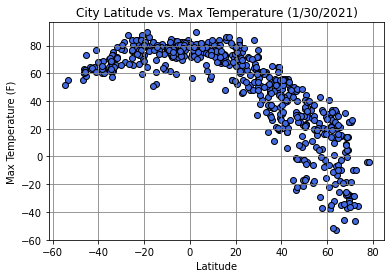

In [6]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Max Temperature"]

plt.title("City Latitude vs. Max Temperature (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_temp.png')
plt.show()

### Analysis:
    - The closer to the equator the higher the temperature will be in those cities.

## Latitude vs. Humidity Plot

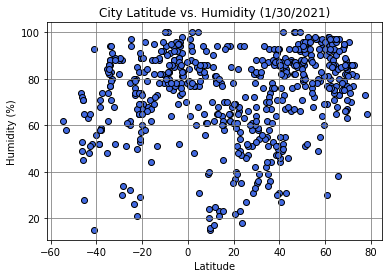

In [7]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Humidity"]

plt.title("City Latitude vs. Humidity (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_humidity.png')
plt.show()

### Analysis:
    - The humidity level varies worldwide with a majority of cities being above 60% but no correlation to the equator can be made.

 ## Latitude vs. Cloudiness Plot

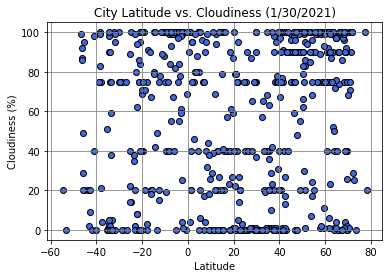

In [8]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Cloudiness"]

plt.title("City Latitude vs. Cloudiness (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_cloudiness.png')
plt.show()

### Analysis:
    - Most cities experience either 100% cloudy or 0% with no significant correlation to the equator.

 ## Latitude vs. Wind Speed Plot

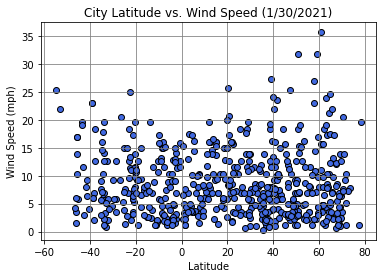

In [9]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Wind Speed"]

plt.title("City Latitude vs. Wind Speed (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_windspeed.png')
plt.show()

### Analysis:
    - A majority of the cities experience between 0 and 15 mph wind gusts, there is no correlation in latitude or the distance from the equator.

 ## Linear Regression

In [10]:
northern_hem_df = weather_df.loc[(weather_df['Latitude']) > 0, :]
northern_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Sakaiminato,35.5500,133.2333,37.40,93,40,6.91,JP,1612045502
2,Palencia,42.4167,-4.5000,39.99,89,27,7.00,ES,1612045499
5,Svetlaya,46.5389,138.3297,-0.83,82,100,11.97,RU,1612045507
6,Puro,12.4841,123.3827,76.10,79,99,16.06,PH,1612045509
7,Provideniya,64.3833,-173.3000,-13.25,83,72,10.29,RU,1612045510


## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8498808727329626


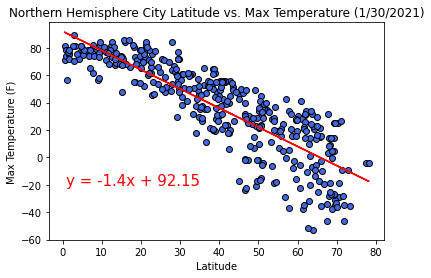

In [11]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Max Temperature"]

plt.title("Northern Hemisphere City Latitude vs. Max Temperature (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1,-20),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_temp_north_reg.png')
plt.show()

In [12]:
southern_hem_df = weather_df.loc[(weather_df['Latitude']) < 0, :]
southern_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,62.01,83,0,1.01,AU,1612045501
3,Punta Arenas,-53.1500,-70.9167,55.40,58,0,21.85,CL,1612045326
4,Chui,-33.6971,-53.4616,75.52,71,59,14.00,UY,1612045506
9,Ushuaia,-54.8000,-68.3000,51.80,62,20,25.32,AR,1612045488
10,Mataura,-46.1927,168.8643,63.32,49,87,1.59,NZ,1612045514


 ## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5750982690412154


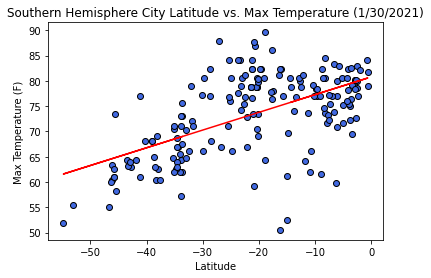

In [13]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Max Temperature"]

plt.title("Southern Hemisphere City Latitude vs. Max Temperature (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_temp_south_reg.png')
plt.show()

### Analysis:
    - The cities in the northern hemisphere have a more significant regression in temperature the farther you move north from the equator than cities in the southern hemisphere.

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3414829140040939


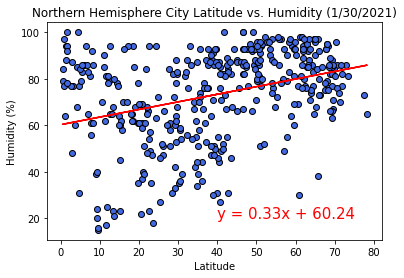

In [14]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Humidity"]

plt.title("Northern Hemisphere City Latitude vs. Humidity (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_humidity_north_reg.png')
plt.show()

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.41598191466091416


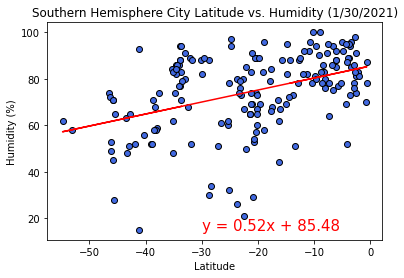

In [15]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Humidity"]

plt.title("Southern Hemisphere City Latitude vs. Humidity (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_humidity_south_reg.png')
plt.show()

### Analysis:
    - The humitity in the southern hemishpere seems to drop as you move away from the equator but the northern hemisphere increases sightly when moving away from the equator.

 ## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2191513131866069


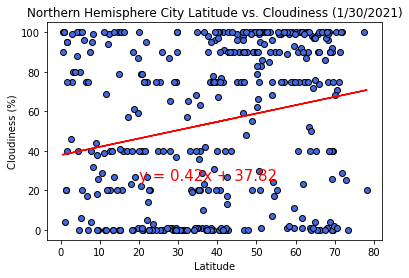

In [16]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Cloudiness"]

plt.title("Northern Hemisphere City Latitude vs. Cloudiness (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_cloudiness_north_reg.png')
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.32548928729202703


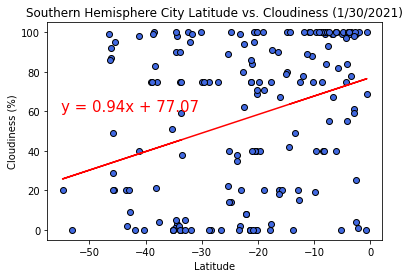

In [17]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Cloudiness"]

plt.title("Southern Hemisphere City Latitude vs. Cloudiness (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_cloudiness_south_reg.png')
plt.show()

### Analysis:
    - The southern hemisphere seems to have more cities with some precent of cloudiness where the northern has no specific trend.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.0033145173609990066


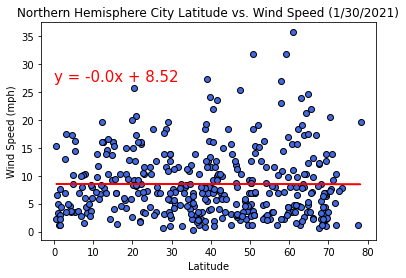

In [18]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Wind Speed"]

plt.title("Northern Hemisphere City Latitude vs. Wind Speed (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_windspeed_north_reg.png')
plt.show()

 ## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1916532906118629


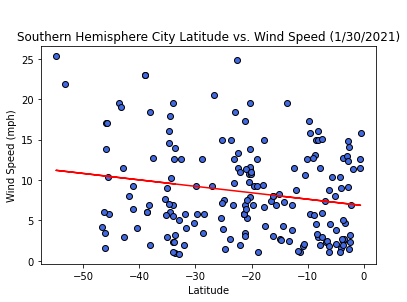

In [19]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Wind Speed"]

plt.title("Southern Hemisphere City Latitude vs. Wind Speed (1/30/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_windspeed_south_reg.png')
plt.show()

### Analysis:
    - Wind speeds are pretty low on avergerage throughout the latitude range with the sorthern having a a slight increase as you move away from the equator.